# Sentiment Analysis in NLP of Amazon Sales Data Project

#### Name: Shiqi Ouyang
#### Date: Mar 17, 2023

# Introduction 

### Description
This Amazon sales dataset contains review and rating information for over a thousand products. In the dataset, product IDs, names, categories, product descriptions, links to product photos and links to their official websites are listed; various prices (before discount, after discount and discount percentage) are also provided; finally, users' ratings and reviews of the products they purchased, including their personal information (IDs and names) are also available in this dataset. This project will mainly focus on further analysis of the content and ratings of the customer's reviews. Although this project is mainly conducted with Natural Language Processing (NLP), it will be more centered on one of the NLP techniques: sentiment analysis.


### Data Source
I chose the **Amazon Sales Dataset** from [Kaggle website](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset), an online platform for data discovery and prediction competitions, where allows many researchers and entrepreneurs to publish their datasets. This dataset was scraped from the official Amazon website via BeautifulSoup and WebDriver in Python by KARKAVELRAJA J (owner).

### Motivations 
Out of personal interest, I am particularly interested in the relationship between consumer behavior and corporate behavior in the marketplace. This is especially true for a multinational company as large as Amazon, which essentially has a business that spans the entire world. When a company of this magnitude can operate successfully, the idea of analyzing its sales data is irresistible to anyone. And because of my passion for the digital humanities, I believe that doing sentiment analysis on Amazon's user reviews is a very worthwhile endeavor. Not only can we learn about certain specific needs of users, but we can also make predictions about consumer behavior, which helps the company improve better on a humanistic basis and provides the foundation for customer interactions that will drive sales and stabilize its customer base.
  
### Research Questions

Based on the data set and my interests, I decided to focus my interest in solving the following problems:

- **Price & Rating**

*a. What is the relationship between product price and user rating? b. Does discounting boost customers' consumption as well as ratings?*

- **Natural Language Processing (NLP)**

*a. Which words are most frequently used by users in review titles and content?*

- **Sentiment Analysis**

*a. What is the overall sentiment of users about the product in the dataset? Which words are used most often in negative/positive reviews?*

*b. Is there a positive relationship between emotions and ratings? If not, why?*

### Data Limitation
I would like to declare here that this dataset has just over a thousand product data information. Although this number is not very small, in my analysis I found that most of the products in this dataset are concentrated in specific categories, and that the dataset does not contain all the product categories available on Amazon. Based on just over a thousand records we cannot represent quite accurately the overall representation of user reviews for each category, which is a limitation and bias of this dataset and project.

# Exploratory Data Analysis

In [1]:
# Import dataset and data preprocessing

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://github.com/LisaOuyang47/DH140-final-project/raw/main/amazon.csv')

In [4]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [5]:
df.shape

(1465, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
# Check missing value

In [8]:
df.isnull().any()

product_id             False
product_name           False
category               False
discounted_price       False
actual_price           False
discount_percentage    False
rating                 False
rating_count            True
about_product          False
user_id                False
user_name              False
review_id              False
review_title           False
review_content         False
img_link               False
product_link           False
dtype: bool

## Data Overview
Based on a simple inspection of the dataset, I found that this dataset has a total of 1465 product records with 16 columns. All of these columns are marked as object, which is incorrect for some of these columns. In addition, I found that there are missing data in the "rating" column of the dataset. And there are unknown characters in the "discounted_price" and "actual_price" columns.
I will then focus on these issues in the following data cleaning and preprocessing.

##### 1. Remove missing data

In [9]:
df[df['rating_count'].isnull()]

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             ₹199   
324  Computers&Accessories|Accessories&Peripherals|...             ₹249   

    actual_price discount_percentage rating rating_count  \
282         ₹999                 80%    3.0          NaN   
324         ₹999                 75%    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link  
282  https://www.amazon.in/Amazon-Brand-Charging-Su...  
324  https://www.amazon.in/REDTECH-Lightning-Certif...

In [10]:
df.drop([282,324],inplace = True)

In [11]:
df[df['rating_count'].isnull()]

Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link]
Index: []

##### 2. Remove unnecessary chars and convert the data type of 'prices,' 'rating,' 'rating_count,' and 'discount_percentage' to numeric data type

In [12]:
# replace unnecessary characters
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

In [13]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'])
df['actual_price'] = pd.to_numeric(df['actual_price'])
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'])

##### 3. Drop row(s) that has unvalid value(s)

In [14]:
df[df['rating'] == '|']

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating rating_count  \
1279        2499.0                   16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1279  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1279  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...

In [15]:
df.drop(index = 1279, inplace= True)

In [16]:
df['rating'] = pd.to_numeric(df['rating'])
df['rating_count'] = pd.to_numeric(df['rating_count'])

##### 4. Drop duplicate values

In [17]:
df.duplicated(keep = False)

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1462, dtype: bool

##### 5. Summary statistics of the dataset

In [18]:
df.shape

(1462, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   o

In [20]:
df.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1462.000000    1462.000000          1462.000000  1462.000000   
mean        3129.981826    5453.087743            47.672367     4.096717   
std         6950.548042   10884.467444            21.613905     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1670.000000            50.000000     4.100000   
75%         1999.000000    4321.250000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000

In [21]:
df.describe(include = 'all')

product_id                                       product_name  \
count         1462                                               1462   
unique        1348                                               1334   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

                                                 category  discounted_price  \
count                                                1462       1462.000000   
unique                                                211               NaN   
top     Computers&Accessories|Accessories&Peripherals|...               NaN   
freq                                                  231               NaN   
mean                                                  NaN       3129.981826   
std                                                   NaN       6950.548042   
min                                                   NaN         39.000000   
25%                                                   NaN        325.000000   
50%                                                   NaN        799.000000   
75%                                                   NaN       1999.000000   
max                                                   NaN      77990.000000   

         actual_price  discount_percentage       rating   rating_count  \
count     1462.000000          1462.000000  1462.000000    1462.000000   
unique            NaN                  NaN          NaN            NaN   
top               NaN                  NaN          NaN            NaN   
freq              NaN                  NaN          NaN            NaN   
mean      5453.087743            47.672367     4.096717   18307.376881   
std      10884.467444            21.613905     0.289497   42766.096572   
min         39.000000             0.000000     2.000000       2.000000   
25%        800.000000            32.000000     4.000000    1191.500000   
50%       1670.000000            50.000000     4.100000    5179.000000   
75%       4321.250000            63.000000     4.300000   17342.250000   
max     139900.000000            94.000000     5.000000  426973.000000   

                                            about_product  \
count                                                1462   
unique                                               1290   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                  user_id  \
count                                                1462   
unique                                               1191   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%        

# Exploratory Data Visualizations
 
### Analytical Process

Having obtained a clean, tidy dataset, I can then perform some exploratory analysis on the data. To start, I explored the ratings, discount percentages, and product types in the dataset, given that these helped me understand the basics of the data and provide the context for the analysis associated with the main research questions in the following sections. Specifically, I first made a histogram of user ratings of the product, which shows the frequency of each rating. Next, I explored the distribution of discount percentages for all products; in addition, I intentionally looked at the frequency of discount percentages for products with ratings greater than 4.0 to demonstrate whether specific discount strengths lead to higher ratings; finally, I categorized the product types in the dataset into broad categories, and then I explored which product types made up the the largest proportion of this dataset. 

##### 1.1 Histogram: What's the most common rating in this dataset?

In [22]:
import matplotlib.pyplot as plt
import numpy as np

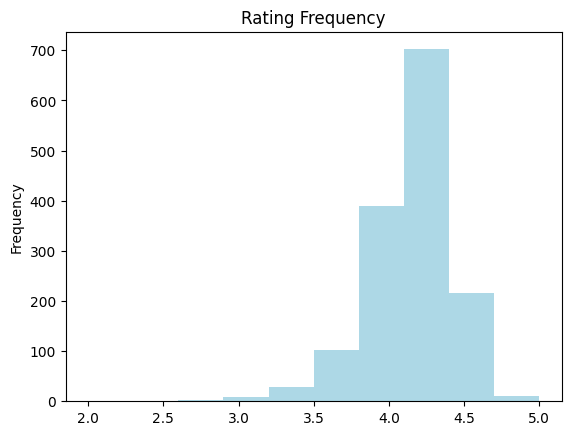

In [23]:
df['rating'].plot(kind = 'hist', bins = 10, color = 'lightblue', title = 'Rating Frequency');

##### 1.2 Boxplot: The discount percentage in general

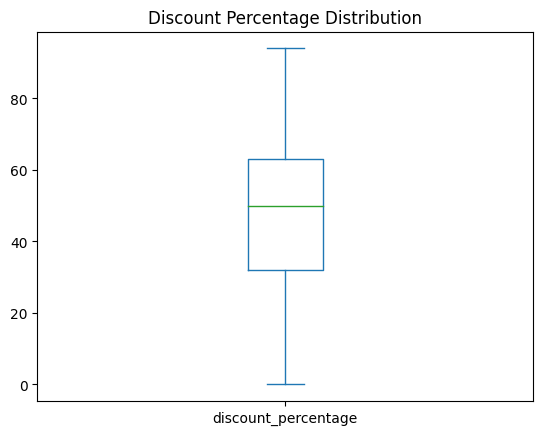

In [24]:
df.plot(y = 'discount_percentage', kind = 'box', title = 'Discount Percentage Distribution');

##### 1.3 Histogram: Percentage frequency of discounts for products with ratings greater than 4.0 

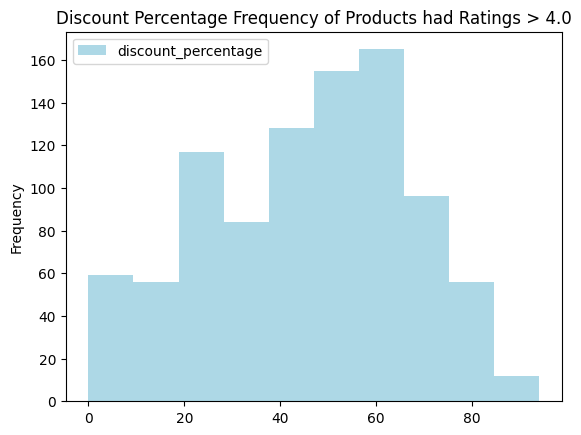

In [25]:
truncted_data = df.loc[df['rating'] > 4.0]

truncted_data.plot.hist(y = 'discount_percentage', color = 'lightblue', bins = 10,
                       title = 'Discount Percentage Frequency of Products had Ratings > 4.0');

##### 1.4 Bar Plot: Number of products in each category

In [26]:
# Cleaning Product Category
df['grouped_category'] = df['category'].str.split('|').str[0]
df.drop('category', axis=1, inplace=True)

In [27]:
# Create dataset
data = {'count':df.groupby(['grouped_category'])['grouped_category'].count()}
data = pd.DataFrame(data)
data = data.reset_index()
data = data.sort_values(by = 'count', ascending = False)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Computers&Accessories'),
  Text(2, 0, 'Home&Kitchen'),
  Text(3, 0, 'OfficeProducts'),
  Text(4, 0, 'HomeImprovement'),
  Text(5, 0, 'MusicalInstruments'),
  Text(6, 0, 'Car&Motorbike'),
  Text(7, 0, 'Health&PersonalCare'),
  Text(8, 0, 'Toys&Games')])

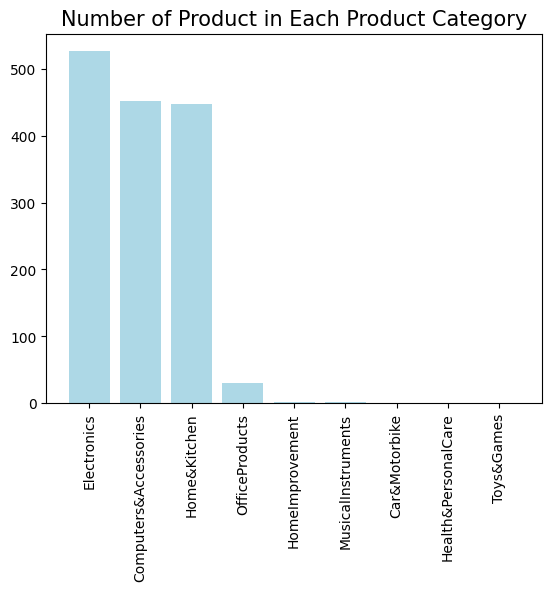

In [28]:
plt.bar(data['grouped_category'],data['count'], color = 'lightblue')
plt.title('Number of Product in Each Product Category', fontsize=15)
plt.xticks(fontsize = 10, rotation = 90)

### Findings of Exploration Visualizations

Viz 1.1: According to this rating frequency distribution plot, I found that the vast majority of ratings are distributed between 4.0 and 4.5, which is a fairly high rating, indicating that users are relatively satisfied with the product.

Viz 1.2: The plot shows that the median percentage of discounts is around 50%, with the highest being 90% and the lowest being 0%, and about half of the percentage of discounts are concentrated between 30% and 60%. Overall, there is a relatively large variation in discount levels in the data set.

Viz 1.3: Combined with Figures 1.1 and 1.2, this graph shows that the discount percentage for most products rated 4.0 or higher is between 40-65%, which is consistent with what is shown in Figure 1.2. Since a large portion of the product ratings are centered on 4.0-4.5, along with the large variation in discount percentages, there are also many discounts between 20-30% in this graph, which means that it is not a clear indication that the greater the discount, the higher the rating.

Viz 1.4: Three product categories make up the majority of this dataset, namely "electronics," "Computers & Accessories," and "Home & Kitchen." Except for "Office Products," which has about 30 products, the remaining product categories each only account for 1-2 products in this dataset, thus creating a bias and limitation in the data. In this case, there is no way to categorize and analyze the data with only one or two products in these categories, hence in the next part of the analysis, I will mainly discuss the top four product categories, so as to be more representative.

# Data Analysis & Data Visualizations

I will analyze the data and complete the visualization in sections based on the research questions. 

## Price & Rating
### a. What is the relationship between discount price and user rating?

In [29]:
data1 = {'count':df.groupby(['grouped_category'])['grouped_category'].count(),
         'mean_discounted_price': df.groupby(['grouped_category'])['discounted_price'].mean(),
         'mean_discount_percentage': df.groupby(['grouped_category'])['discount_percentage'].mean(),
         'mean_rating': df.groupby(['grouped_category'])['rating'].mean()}

data1 = pd.DataFrame(data1)
data1 = data1.reset_index()

In [33]:
!pip install plotly_express

In [34]:
import plotly_express as px

In [35]:
px.scatter(data1,
           x="mean_rating", 
           y="mean_discount_percentage",
           hover_name='grouped_category', color = 'grouped_category', 
           size = 'count',size_max = 80,
           labels={
                     "mean_discount_percentage": "Mean Discount Percentage (%)",
                     "mean_rating": "Mean Rating",
                     "grouped_category": "Product Category"
                 },
           title = "Would Users' Rating Being Influenced by the Discount Level of the Product?"
          )


### Analytical Process of Visualizations 1.1

To better analyze the various data within each product category, I first created a new dataset, grouped by different product categories, containing average discount prices, average discount percentages, and average ratings.
The visualization above is the scatter plot of the relationship between the mean rating of products of each product category and their mean discount percentage. The size is represented by the total number of the products in correspounding category; the color is based on different product categories. Since there are some categories have only less than 10 products, which is hard to be seen in the graph, I manually adjust the size_max to make them more easier to see.  


### Finding 

First, from the visualization, we can clearly see that categories "Home&Kitchen," "Electronics," and "Computers&Accesories" are the top three categories that have the most products belong to them; where category "Electronics" has the most products in this dataset. Except for the "Office Products" and "Toys & Games" categories in the lower right corner, we can see that the remaining product categories basically follow the same pattern of the higher the rating, the higher the percentage of discounts. Similarly, when we focus on just the three product categories with the largest representation (as the others are less representative), we notice essentially the same pattern. Although the rating gap in the data is not very significant, we in turn would be able to conclude that the level of product discount has a positive impact on the user's rating of the product to some extent, i.e. the higher the discount, the higher the rating. 

## Natural Language Processing (NLP)
### a. Which words are most commonly used by users in their review title and content?

##### 1. Tokenization

In [36]:
import nltk
from nltk.tokenize import word_tokenize

In [37]:
a = list(df['review_title'])
review_title = ' '.join(str(b) for b in a)

c = list(df['review_content'])
review_content = ' '.join(str(e) for e in c)

In [38]:
title = []
for w in word_tokenize(review_title.lower()):
    title.append(w)

content = []
for i in word_tokenize(review_content.lower()):
    content.append(i)

##### 2. Remove Stopwords

In [39]:
from nltk.corpus import stopwords
from string import punctuation

In [40]:
bad_chars = ["'s", "--","n't", ".."]
myStopWords = list(punctuation) + stopwords.words('english') + list(bad_chars)

In [41]:
wordsNoStop = [w for w in title if w not in myStopWords]
wordsNoStop_content = [i for i in content if i not in myStopWords]

##### 3. Stemming and Tagging

In [42]:
from nltk.stem.porter import PorterStemmer

In [43]:
wordPorterStems = [PorterStemmer().stem(w) for w in wordsNoStop]
wordPorterStems_content = [PorterStemmer().stem(i) for i in wordsNoStop_content]

In [44]:
pos_tag_title = nltk.pos_tag(wordsNoStop)
pos_tag_content = nltk.pos_tag(wordsNoStop_content)

##### 4. Word frequencies

In [45]:
from nltk.probability import FreqDist

In [46]:
freq_title = FreqDist(wordsNoStop)

In [47]:
freq_content = FreqDist(wordsNoStop_content)

In [48]:
# Get the most common top 15 words in review title and content

In [49]:
df_title = pd.DataFrame({'title': FreqDist(wordsNoStop).keys(),
                        'title_freq': FreqDist(wordsNoStop).values()})
df_title = df_title.sort_values(by = 'title_freq', ascending = False).reset_index()
df_title.head()

index    title  title_freq
0      8     good        3854
1      6  product        2289
2     27     nice         882
3      9  quality         732
4      5    money         539

In [50]:
print('Standard Deviation of Review Title: ', df_title['title_freq'].std())

Standard Deviation of Review Title:  74.27967808423287


In [51]:
df_content = pd.DataFrame({
                        'content': FreqDist(wordsNoStop_content).keys(),
                        'content_freq': FreqDist(wordsNoStop_content).values()})
df_content = df_content.sort_values(by = 'content_freq', ascending = False).reset_index()
df_content.head()

index  content  content_freq
0      8     good          6043
1     13  product          3640
2     19  quality          2278
3    382      use          1604
4     67      one          1359

In [52]:
print('Standard Deviation of Review Content: ', df_content['content_freq'].std())

Standard Deviation of Review Content:  69.32795679884457


##### 5. Visualization of word frequencies

In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [54]:
fig = make_subplots(rows = 1, cols = 2,
                    subplot_titles = ("Word Frequency of Review Title",
                                    "Word Frequency of Review Content"))

fig.add_trace(
    go.Scatter(
        x = df_title['title_freq'].head(n = 15),
        y = df_title['title'].head(n = 15),
        name = 'Review Title'
    ),
    row = 1, col = 1
)

fig.add_trace(
    go.Scatter(
        x = df_content['content_freq'].head(n = 15),
        y = df_content['content'].head(n = 15),
        name = 'Review Content'
    ),
    row = 1, col = 2
)
fig.update_xaxes(title_text = "Word Count", row = 1, col = 1)
fig.update_xaxes(title_text = "Word Count", row = 1, col = 2)

fig.update_yaxes(title_text="Word", row = 1, col = 1)

fig.update_layout(height = 600, width = 800)

fig.show()

### Analytical Process of Visualizations 2.1

First I conducted natural language processing: tokenization, stopwords removal, stemming, and tagging for all review titles and content in the dataset in order to obtain a clean text for all titles and content. Then I created two new datasets based on the frequency of words in the review titles and content, including each individual word and its corresponding total frequency of occurrence. I then further exam their standard deviation. Finally, I visualized the top 15 words in terms of frequency.

 
### Finding

In the review title plot, we can get a rough idea of the user's attitude towards the product, i.e. which aspects of performance/attributes are important to the user. The most frequent words we see are 'good', followed by 'product,' 'nice,' ' quality,' 'money,' 'best,' and 'value.' Based on these words, we can in fact get a approximately understand that the customer reviews of the products in this dataset are generally positive; and that the customers pay more attention to the quality and price of the products and the value between them. 

In the content of the reviews we can expect the same conclusions, only with more description of the product. Besides the first few words 'good,' 'product,' and 'quality' which are virtually the same as in the titles of the reviews we see the words 'use,' 'cable,' and 'phone,' which allows us to learn that the majority of products and user purchases in this dataset are electronically related, in line with the the popular product categories we found earlier.

Finally, looking at the number of standard deviations for review titles and review contents, which are around 74.3 and 69.3, respectively, they are both very high. Since the standard deviation is a measure of the dispersion of the data in terms of the mean, we can say that the word frequencies of the review titles and contents are very dispersed. 

## Sentiment Analysis
### a. What is the overall sentiment of users review in the dataset?


In [55]:
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

In [56]:
# define a function that get review content for every rows in dataset
def getSentiment(i):
    return sia.polarity_scores(i)['compound']

In [57]:
df_new = df[['rating', 'review_content', 'grouped_category']]
df_new['sentiment'] = [getSentiment(content) for content in df_new['review_content']]

/tmp/ipykernel_25/1918612639.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
elec = df_new.loc[(df_new['grouped_category'] == 'Electronics')]
computer = df_new.loc[(df_new['grouped_category'] == 'Computers&Accessories')]
home = df_new.loc[(df_new['grouped_category'] == 'Home&Kitchen')]
office = df_new.loc[(df_new['grouped_category'] == 'OfficeProducts')]

In [59]:
trace1 = go.Histogram(
                x = elec.sentiment,
                name = "Electronics", nbinsx=25)
trace2 = go.Histogram(
                 x = home.sentiment,
                name = "Home & Kitchen")
trace3 = go.Histogram(
                x = computer.sentiment,
                name = "Computers&Accessories")
trace4 = go.Histogram(
                x = office.sentiment,
                name = "OfficeProducts")

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

fig.update_layout(xaxis=dict(range=[0,1]), title = 'Overall Sentiment of Review Content')
fig.update_xaxes(title_text = "Sentiment Compound")

fig.update_yaxes(title_text="Count")

fig.show()

### Analytical Process of Visualizations 3.1

For the sentiment analysis, I mainly used SentimetnIntensityAnalyzer from the vader analysis package. After defining a function that would get the sentiment of each product review, I then created a new dataset with product reviews, ratings, categories and sentiment compound scores. Further I created sub-datasets of the top four product categories based on their popularity for visualization purposes. Subsequently I created visualizations based on the counts of their sentiment compound scores. Only the sentiment scores from 0-1.0 are shown in the graph, but the visualization of the negative sentiment scores can be obtained by dragging the horizontal axis with the mouse.

### Finding

Sure enough, as we predicted earlier, most products fall into the range of 0.9-1.0 sentiment scores. This not only proves that customer satisfaction with the products is generally high, but also further demonstrates the limitations of this dataset. It is possible that due to the overall small number of products, the results are not very differentiated and may also be relatively unrepresentative. However, in general, the overall customer review sentiment in this dataset is relatively very positive.


### b. Which words are used most often in negative/positive reviews？

In [60]:
from wordcloud import WordCloud, ImageColorGenerator

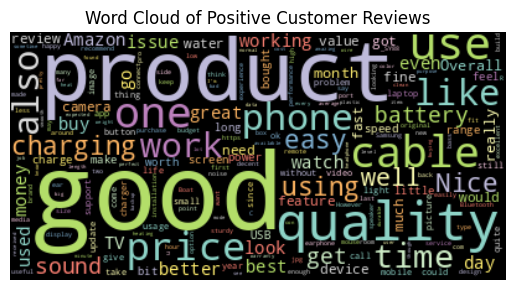

In [61]:
positive =' '.join([i for i in df_new['review_content'][df_new['sentiment'] > 0.5]])
wordcloud = WordCloud(stopwords=myStopWords, background_color="black", 
                      collocations=False, colormap = 'Set3').generate(positive)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Positive Customer Reviews')
plt.show()

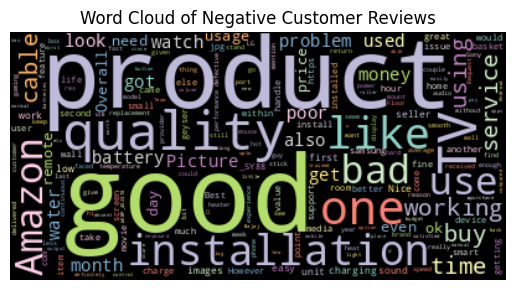

In [62]:
negative =' '.join([i for i in df_new['review_content'][df_new['sentiment'] < -0.5]])
wordcloud = WordCloud(stopwords=myStopWords, background_color="black", 
                      collocations=False, colormap = 'Set3').generate(negative)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.title('Word Cloud of Negative Customer Reviews')
plt.show()

### Analytical Process of Visualizations 3.2

Based on the analysis in the previous section, I went a step further and generated word clouds in the negative and positive review content based on the sentiment scores. Since most of the comments were classified as positive, here I used 0.5 and -0.5 as the dividing line between negative and positive to better show the difference/similarity between them.
 
### Finding

Based on the positive word cloud content, as in the previous review content word frequency distribution plot, we saw many positive words. Not only are customers satisfied with the quality of the product itself, we also capture words such as 'time’ and 'Amazon,' which could be a side indication that customers are reacting positively to values such as the quality of the product, and we can speculate that they are also satisfied with Amazon as platform itself, as well as the delivery time.

In the negative rating content we unusually observed a high frequency of the word "good". Although most of the words are related to positive content, we can infer that they occur in a different context than the previous word cloud based on the negative sentiment scores. This means that although vader marks some comments as negative, remembering that most of the comments in this dataset are very positive, there is an inevitable problem of under-representation in presenting negative word clouds. As a whole, we can deduce that in negative reviews, customers are likely to set the overall tone of the review as ‘good,' i.e. they would write comments like "this product is good, but xxx," and the word ‘but' is usually more appealing to machine sentiment recognition systems. That is, in addition to the obvious comment about a product being bad/poor, a customer may feel good about the quality of the product in general, but be dissatisfied with some specific aspects, such as "service," or "installation," and therefore be rated as a negative comment.


### c. Is there a correlation  between sentiments and ratings?

In [63]:
px.scatter(df_new,
           x='sentiment',
           y='rating',
           color = 'grouped_category',
           hover_name='grouped_category', 
           title = "Do more positive reviews lead to higher ratings? Or vice versa?")


In [64]:
# Calculate the P-value between variable sentiment and rating
np.corrcoef(df_new['sentiment'], df_new['rating'])

array([[1.        , 0.23779857],
       [0.23779857, 1.        ]])

### Analytical Process of Visualizations 4.1

In the last section, I made a visualization based on sentiment and rating scales to represent the relationship between them. I mainly wanted to know if there is a positive correlation between the customers' ratings and their review sentiment. In addition, I calculated the correlation coefficient using Numpy's corrcoef() function, which allowed me to better understand the exact relationship between the two variables. This function will return a matrix of correlation coefficients, where correlation[0][1] and [1][1] represent the correlation between sentiment and reviews.


### Finding

First of all, from the plot, it's clear that this doesn't have a clue, with most of the data scattered between ratings of 3.0-4.5, and sentiment doesn't seem to make a difference to the ratings, especially between sentiment scores of 0.5-1.0, with ratings unevenly distributed from 2.5 all the way up to 5.0. And looking at the correlation coefficient, we got a value of about 0.2. This number is very close to 0, which means that it does not represent any correlation. As a result from here we can confidently conclude that the sentiment scores and customer ratings in this dataset do not have a significant correlation.

This turned out to be different than what I thought when I first obtained the dataset, but then as I explored this dataset in depth, I did have hypotheses about how we might not get representative and meaningful results in terms of the relationship between the review sentiment scores and the ratings. There are two reasons for this, firstly, most of our sentiment scores lean towards a very positive range and the ratings are also concentrated between 3.4-4.5 which in effect causes these two sets of data spread evenly across these ranges and therefore it is likely that we will not get a significant correlation; secondly, as mentioned earlier, the overall amount of data in this dataset is small and there is an ontological bias.

Nevertheless, we could still get some slightly meaningful information from the plot. For instance, in the Computers&Accessories category, its product rating stays above 3.25 regardless of the customer's review sentiment score, which also applies to the Office Products category, while the two remaining product categories with a large representation "Home & Kitchen" and "Electroncs" have a much wider (and lower) range of ratings. 

# Discussion

Based on all the above analysis and visualizations, we can conclude in general that: a) in the relationship between discount levels and customer ratings, we observe a positive relationship, i.e., when a product has a larger percentage of discount, in general the customer feedback rating for that product is higher; b) When customers write review titles and content, they tend to focus on product quality, value, and price, and will judge whether a product is worth buying in between. Also, customers buy more products related to electronics, such as chargers, cables, TVs, and cell phones; c) The overall sentiment of customer reviews in this dataset is positive, with an extreme leftward skew across the dataset; d) In positive reviews, customers often use positive adjectives to describe the quality of the product, and they are also more concerned about delivery. Whereas positive descriptions of the product also appear in the negative reviews, we speculate that customers in fact also expressed concerns about the installation, usage time and service of the product. This is where the python sentiment analyzer falls short; e) Finally, as the scatter plot shows, for this dataset there is no meaningful correlation between the sentiment of customer reviews and customer ratings.

These findings are useful and meaningful to some extent. For example, I found a positive relationship between discounts and ratings, which can provide insights for merchants when developing their pricing strategies. In addition, I further explored the sentiment score of customer reviews, which can help Amazon merchants predict customer behavior and demand for specific products, making the new products more adaptable. Additionally, based on customer reviews, it can also provide insights to Amazon merchants when providing customer service, customer interactions, developing customer preference reports, and stabilizing their customer base.

# Final Thoughts

In an era of freedom of speech, where any user can effortlessly express opinions on the internet and generate large amounts of data in a short period of time, it has become important that we need to extract insights from the data and make decisions that contribute to the business, and this cannot be done without an essentially the involvement of humanity. In the course of analyzing the Amazon sales dataset, I learned about the incomplete correctness of machine analysis, such as the assertion of customer review sentiment, when an emotionally attached human being goes to read a review, depending on human culture, we may come to a different conclusion than a machine sentiment analysis. This also illustrates the limitations of the vader I used in my analysis, a sentiment analysis package trained to analyze social media texts that would focus on the word ‘but' in a customer's comment and therefore interpret the entire comment as negative, or treat the comment as positive because of the many positive words defined in advance.

During the analysis, I learned a very striking point for the future of machine learning of this dataset, which is the importance of selecting the dataset. Bias arises when the values we observe differ from those predicted; and the size of the dataset usually presents different and significant problems, such as data imbalance (Maheswari, 2023). In the current dataset, because it is too concentrated and small, we are not able to obtain meaningful results when analyzing some issues such as the relationship between sentiment scores and ratings, which can also pose problems for more in-depth analysis later. Therefore, my reflection and statement here is that in the selection of the dataset, we should first ensure that the dataset is unbiased, secondly we should clean the small dataset more deeply and care more about some data that makes the analysis results meaningless, and at the same time ensure that the project ends with a critique of the data as a way to not bring misleading.